In [22]:
#My imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
#read in the data
df = pd.read_csv('257k-gaiadr2-sources-with-photometry.csv')

In [3]:
#Drop irrelevant columns
X = df.drop(columns=["phot_g_mean_mag", "tycho2_id", "source_id"])

In [4]:
#Prediction vector
y = df['phot_g_mean_mag']

In [5]:
#Splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [6]:
#create the SVR model, with a radial base function kernel (for best results). 
#We already know quadratic regression is better than linear, so we can safely assume a rbf is more accurate instead of linear kernalisation
svr = SVR(kernel='rbf') 

In [7]:
#only limited preprocessing is needed, Kernel functions will do the rest
svr.fit(X_train, y_train) 

SVR()

In [8]:
y_pred_test = svr.predict(X_test)
y_pred_train = svr.predict(X_train)

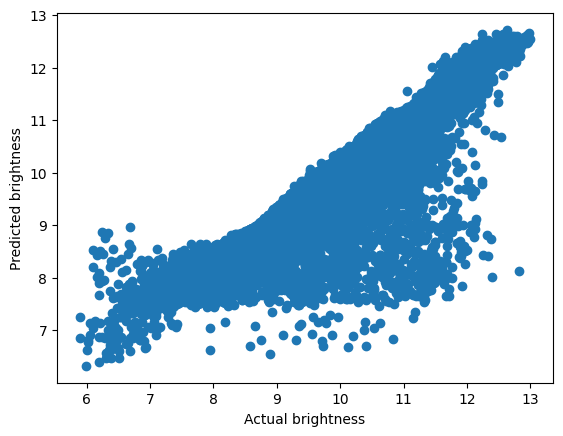

In [9]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

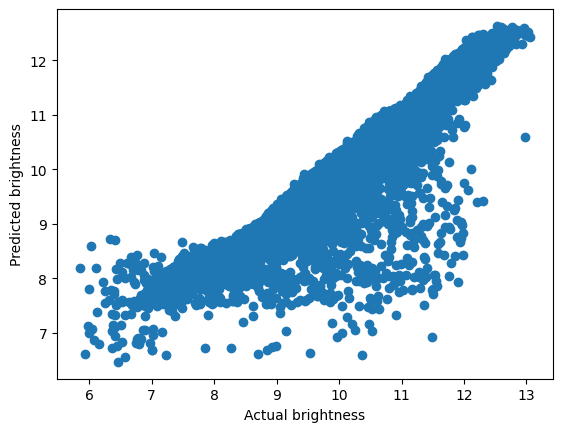

In [10]:
#Graph prediction
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [27]:
#loss functions. We do end up getting higher loss than the linear and polynomial models
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MAPE

0.010894918979210516

In [30]:
#Applied science part. Our null hypothesis is that the observed and expected frequencies have NO SIGNIFICANT DIFFERENCE
#Pearson's correlation test
r2_score(y_test, y_pred_test)
#The high correlation (R^2 score) means the prediction and the actual frequencies are similar, which is what we want. Hence we accept the null hypothesis
#However, our linear and polynomial regressions produce a slightly higher correlation, meaning they are more accurate.

0.9460415624591131

In [34]:
#The F test
F = (np.var(y_pred_test))/(np.var(y_test))
F
#Our F value is less than 1 and that of 32 DoF, with apha = 0.05. Once again, this means we can accept our null hypothesis

0.9511276561289465